In [1]:
import pandas as pd
import datetime 
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
from config import db_password

In [2]:
playlist_df = pd.read_csv(f'./Resources/features.csv', index_col=0)

In [3]:
# add a column to convert ms to minutes
playlist_df['duration_mins'] = pd.to_datetime(playlist_df['duration_ms'], unit='ms').dt.strftime('%H:%M:%S')

In [4]:
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins
0,0.798,0.697,0,-7.139,1,0.0891,0.020200,0.000000,0.2590,0.745,90.031,audio_features,0skYUMpS0AcbpjcGsAbRGj,spotify:track:0skYUMpS0AcbpjcGsAbRGj,https://api.spotify.com/v1/tracks/0skYUMpS0Acb...,https://api.spotify.com/v1/audio-analysis/0skY...,186964,4,00:03:06
1,0.646,0.640,8,-5.554,1,0.0304,0.001190,0.000000,0.1380,0.127,105.957,audio_features,7up4SX2l8FAnisrUXoGupd,spotify:track:7up4SX2l8FAnisrUXoGupd,https://api.spotify.com/v1/tracks/7up4SX2l8FAn...,https://api.spotify.com/v1/audio-analysis/7up4...,175699,4,00:02:55
2,0.950,0.891,2,-2.653,1,0.2410,0.064500,0.000018,0.3090,0.912,133.010,audio_features,4C6Uex2ILwJi9sZXRdmqXp,spotify:track:4C6Uex2ILwJi9sZXRdmqXp,https://api.spotify.com/v1/tracks/4C6Uex2ILwJi...,https://api.spotify.com/v1/audio-analysis/4C6U...,170977,4,00:02:50
3,0.762,0.861,0,-3.296,1,0.0955,0.018500,0.000000,0.2640,0.955,120.048,audio_features,0xzI1KAr0Yd9tv8jlIk3sn,spotify:track:0xzI1KAr0Yd9tv8jlIk3sn,https://api.spotify.com/v1/tracks/0xzI1KAr0Yd9...,https://api.spotify.com/v1/audio-analysis/0xzI...,172714,4,00:02:52
4,0.871,0.485,7,-8.294,0,0.0411,0.527000,0.000074,0.1690,0.494,119.976,audio_features,5rbuv6zso7QSaKt265H3M3,spotify:track:5rbuv6zso7QSaKt265H3M3,https://api.spotify.com/v1/tracks/5rbuv6zso7QS...,https://api.spotify.com/v1/audio-analysis/5rbu...,219036,4,00:03:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,0.479,0.938,2,-3.058,1,0.0376,0.000075,0.000153,0.1170,0.431,140.056,audio_features,6kNOYOpdMy0w67fC4XPc0q,spotify:track:6kNOYOpdMy0w67fC4XPc0q,https://api.spotify.com/v1/tracks/6kNOYOpdMy0w...,https://api.spotify.com/v1/audio-analysis/6kNO...,264467,4,00:04:24
8101,0.582,0.730,11,-7.678,1,0.0402,0.260000,0.000004,0.1100,0.240,129.981,audio_features,5o9CWfDLfSLJ22BtUSMLBt,spotify:track:5o9CWfDLfSLJ22BtUSMLBt,https://api.spotify.com/v1/tracks/5o9CWfDLfSLJ...,https://api.spotify.com/v1/audio-analysis/5o9C...,201668,4,00:03:21
8102,0.481,0.917,2,-3.366,1,0.0385,0.001040,0.000004,0.3980,0.377,108.747,audio_features,1f8G4jvkONnLMxJMx7V2Ck,spotify:track:1f8G4jvkONnLMxJMx7V2Ck,https://api.spotify.com/v1/tracks/1f8G4jvkONnL...,https://api.spotify.com/v1/audio-analysis/1f8G...,185317,4,00:03:05
8103,0.628,0.787,4,-6.540,1,0.0328,0.003760,0.027200,0.0872,0.611,137.981,audio_features,4Yzy5bGrMOlLpYcOtWxGIM,spotify:track:4Yzy5bGrMOlLpYcOtWxGIM,https://api.spotify.com/v1/tracks/4Yzy5bGrMOlL...,https://api.spotify.com/v1/audio-analysis/4Yzy...,179947,4,00:02:59


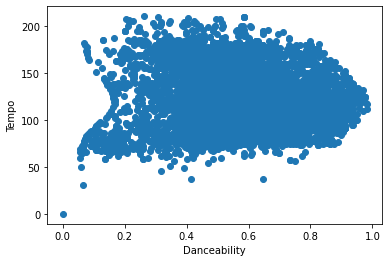

In [5]:
plt.scatter(playlist_df.danceability, playlist_df.tempo)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.show()

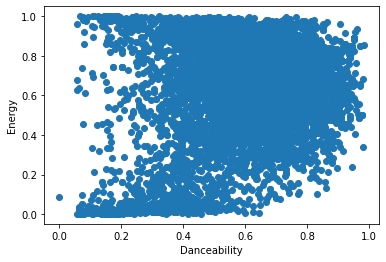

In [6]:
plt.scatter(playlist_df.danceability, playlist_df.energy)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

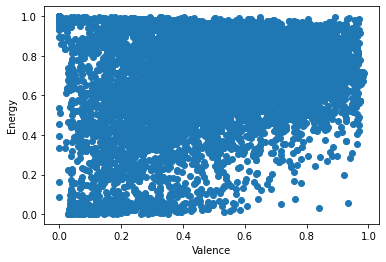

In [7]:
plt.scatter(playlist_df.valence, playlist_df.energy)
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

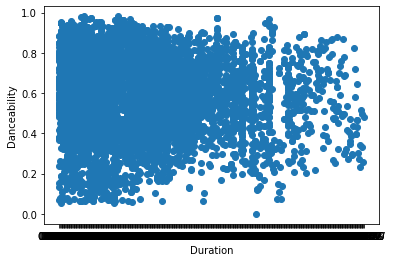

In [8]:
plt.scatter(playlist_df.duration_mins, playlist_df.danceability)
plt.xlabel('Duration')
plt.ylabel('Danceability')
plt.show()

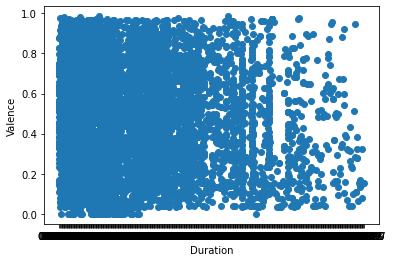

In [9]:
plt.scatter(playlist_df.duration_mins, playlist_df.valence)
plt.xlabel('Duration')
plt.ylabel('Valence')
plt.show()

## fetch from Postgres

In [10]:
#establishing the connection
conn = psycopg2.connect(
   database="playlist_db", user='postgres', password=db_password, host='127.0.0.1', port= '5433'
)

In [11]:
#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [26]:
# #Retrieving DUPLICATE data
# cursor.execute('''
# SELECT f.danceability, f.energy, f.key, f.loudness, f.mode, f.speechiness, f.acousticness, f.instrumentalness, f.liveness, f.valence, f.tempo, f.duration_ms, f.time_signature, p.popularity
# FROM features AS f
# LEFT JOIN playlists AS p
# ON f.uri = p.track_uri;
# ''')

In [31]:
#Retrieving DISTINCT data
cursor.execute('''
SELECT DISTINCT f.danceability, f.energy, f.key, f.loudness, f.mode, f.speechiness, f.acousticness, f.instrumentalness, f.liveness, f.valence, f.tempo, f.duration_ms, f.time_signature, p.popularity
FROM features AS f
JOIN playlists AS p
ON f.uri = p.track_uri
ORDER BY p.popularity DESC;
''')

In [12]:
# #Retrieving ALL data
# cursor.execute('''
# SELECT *
# FROM features AS f
# JOIN playlists AS p
# ON f.uri = p.track_uri;
# ''')

In [13]:
#Fetching all rows from the table
result = cursor.fetchall();
print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
type(result)

list

In [14]:
len(result)

12419

In [15]:
machine_learning_df = pd.DataFrame(result)

In [16]:
type(machine_learning_df)

pandas.core.frame.DataFrame

In [17]:
machine_learning_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,K-Pop ON!,"4,113,578",52,K-Pop,Pop,spotify:playlist:37i9dQZF1DX9tPFwDMOaN1,spotify:track:0skYUMpS0AcbpjcGsAbRGj,88,BLACKPINK,Pink Venom
1,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,SALT,"295,173",70,Pop,Rock,spotify:playlist:37i9dQZF1DX6tPTxr8qwRe,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom
2,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,Pop Rising,"2,642,529",87,Pop,Indie,spotify:playlist:37i9dQZF1DWUa8ZRTfalHk,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom
3,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,Hot Hits USA,"762,848",50,Pop,Pop,spotify:playlist:37i9dQZF1DX0kbJZpiYdZl,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom
4,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,Today’s Top Hits,"31,728,611",50,Pop,R&B,spotify:playlist:37i9dQZF1DXcBWIGoYBM5M,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom


In [19]:
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12419 entries, 0 to 12418
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12419 non-null  float64
 1   1       12419 non-null  float64
 2   2       12419 non-null  int64  
 3   3       12419 non-null  float64
 4   4       12419 non-null  int64  
 5   5       12419 non-null  float64
 6   6       12419 non-null  float64
 7   7       12419 non-null  float64
 8   8       12419 non-null  float64
 9   9       12419 non-null  float64
 10  10      12419 non-null  float64
 11  11      12419 non-null  object 
 12  12      12419 non-null  object 
 13  13      12419 non-null  object 
 14  14      12419 non-null  object 
 15  15      12419 non-null  object 
 16  16      12419 non-null  int64  
 17  17      12419 non-null  int64  
 18  18      12419 non-null  object 
 19  19      12419 non-null  object 
 20  20      12419 non-null  int64  
 21  21      12419 non-null  object 
 22

In [18]:
#Commit your changes in the database
# conn.commit()

#Closing the connection
conn.close()

In [ ]:
# this is main machine learning layout
machine_learning_df = machine_learning_df.rename(columns=
                                 {
                                  0: 'danceability',
                                  1: 'energy',
                                  2: 'key',
                                  3: 'loudness',
                                  4: 'mode',
                                  5: 'speechiness',
                                  6: 'acousticness',
                                  7: 'instrumentalness',
                                  8: 'liveness',
                                  9: 'valence',
                                  10: 'tempo',
                                  11: 'type',
                                  12: 'id',
                                  13: 'uri',
                                  14: 'track_href',
                                  15: 'analysis_url',
                                  16: 'duration_ms',
                                  17: 'time_signature',
                                  18: 'popularity'
                                  })                  

In [20]:
# # this layout is for a full join
# machine_learning_df = machine_learning_df.rename(columns=
#                                  {
#                                   0: 'danceability',
#                                   1: 'energy',
#                                   2: 'key',
#                                   3: 'loudness',
#                                   4: 'mode',
#                                   5: 'speechiness',
#                                   6: 'acousticness',
#                                   7: 'instrumentalness',
#                                   8: 'liveness',
#                                   9: 'valence',
#                                   10: 'tempo',
#                                   11: 'type',
#                                   12: 'id',
#                                   13: 'uri',
#                                   14: 'track_href',
#                                   15: 'analysis_url',
#                                   16: 'duration_ms',
#                                   17: 'time_signature',
#                                   18: 'playlist_name',
#                                   19: 'followers',
#                                   20: 'songs',
#                                   21: 'genre_1',
#                                   22: 'genre_2',
#                                   23: 'playlist_uri',
#                                   24: 'track_uri',
#                                   25: 'popularity',
#                                   26: 'artist_name',
#                                   27: 'song_name'
#                                  })                  

In [21]:
machine_learning_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,playlist_name,followers,songs,genre_1,genre_2,playlist_uri,track_uri,popularity,artist_name,song_name
0,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,K-Pop ON!,"4,113,578",52,K-Pop,Pop,spotify:playlist:37i9dQZF1DX9tPFwDMOaN1,spotify:track:0skYUMpS0AcbpjcGsAbRGj,88,BLACKPINK,Pink Venom
1,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,SALT,"295,173",70,Pop,Rock,spotify:playlist:37i9dQZF1DX6tPTxr8qwRe,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom
2,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,Pop Rising,"2,642,529",87,Pop,Indie,spotify:playlist:37i9dQZF1DWUa8ZRTfalHk,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom
3,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,Hot Hits USA,"762,848",50,Pop,Pop,spotify:playlist:37i9dQZF1DX0kbJZpiYdZl,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom
4,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,0.745,...,Today’s Top Hits,"31,728,611",50,Pop,R&B,spotify:playlist:37i9dQZF1DXcBWIGoYBM5M,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom


In [22]:
# machine_learning_df.to_csv('Resources/all_data.csv')

In [42]:
machine_learning_df['popularity'].describe()

count    6803.000000
mean       53.722769
std        16.877358
min         0.000000
25%        41.000000
50%        54.000000
75%        66.000000
max       100.000000
Name: popularity, dtype: float64

([<matplotlib.axis.XTick at 0x18f8df0f508>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

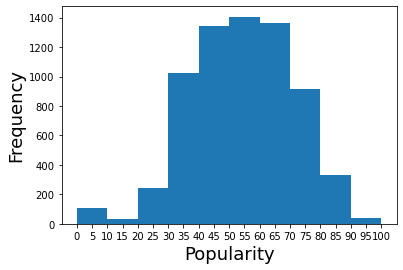

In [43]:
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

plt.hist(machine_learning_df['popularity'])
plt.xlabel("Popularity", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(ticks)

## convert popularity to a binary classifier
greater than or equal to mean (60) = 1
less than 60 = 0

In [44]:
machine_learning_df['popular'] = np.where(machine_learning_df['popularity']>=60, 1, 0)

In [45]:
# slice to see if it worked
machine_learning_df[3595:3605]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,popular
3595,0.754,0.333,4,-10.201,0,0.0516,0.0116,0.906000,0.0704,0.600,180.044,128339,4,53,0
3596,0.755,0.593,5,-9.472,1,0.0484,0.2810,0.504000,0.0970,0.501,93.002,207787,4,53,0
3597,0.766,0.272,2,-12.642,1,0.0572,0.6580,0.935000,0.2810,0.390,88.987,142921,4,53,0
3598,0.767,0.697,9,-5.280,1,0.0899,0.1220,0.000041,0.1070,0.918,160.032,144192,4,53,0
3599,0.768,0.374,1,-5.552,1,0.0586,0.4550,0.000226,0.2450,0.229,91.903,191075,4,53,0
3600,0.769,0.836,8,-4.150,1,0.2440,0.0618,0.000000,0.1820,0.651,88.978,237720,4,53,0
3601,0.770,0.234,11,-7.411,0,0.2450,0.4530,0.074700,0.1000,0.578,90.198,137484,4,53,0
3602,0.786,0.663,6,-5.103,0,0.0562,0.1210,0.000000,0.1120,0.134,102.017,174617,4,53,0
3603,0.798,0.718,8,-6.874,1,0.0570,0.0332,0.571000,0.0945,0.561,112.017,195605,4,53,0
3604,0.806,0.713,11,-6.792,1,0.1570,0.1810,0.000000,0.0601,0.513,121.941,193109,4,53,0


In [46]:
X = machine_learning_df.drop(columns=['popularity','popular'])
y = machine_learning_df['popular']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)

classifier

LogisticRegression(random_state=1)

In [49]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [50]:
predictions = classifier.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1732,0,1
2398,0,1
695,0,1
119,0,1
3484,1,0
...,...,...
2328,0,1
5228,0,0
1081,0,1
2045,0,1


In [51]:
accuracy_score(y_test, predictions)

0.6143445032333921

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[1027   29]
 [ 627   18]]


In [53]:
matrix = pd.DataFrame(matrix, columns=['Predicted True','Predicted False'])

In [54]:
matrix

,Predicted True,Predicted False
0,1027,29
1,627,18


In [55]:
report = classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.62      0.97      0.76      1056
           1       0.38      0.03      0.05       645

    accuracy                           0.61      1701
   macro avg       0.50      0.50      0.40      1701
weighted avg       0.53      0.61      0.49      1701



## scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
X_scaler = scaler.fit_transform(X_train)

In [58]:
type(X_scaler)

numpy.ndarray

In [68]:
X_scaler

array([[-0.63760904,  1.41945945,  1.60049221, ...,  0.07986282,
         0.66601175,  0.20644528],
       [ 1.33590763,  0.44398507, -1.20906988, ...,  0.33108583,
         0.33484061,  0.20644528],
       [-0.33098922, -0.31602307,  1.03857979, ...,  0.11648973,
        -0.1222164 ,  0.20644528],
       ...,
       [-0.34771394, -2.30693101, -0.92811367, ..., -0.76352872,
        -0.40316418, -2.27771463],
       [ 0.80629158, -0.21024874, -0.36620125, ..., -0.34299012,
        -0.11249534,  0.20644528],
       [-0.49266149, -0.82922445,  0.75762358, ...,  0.68990877,
         0.41285312,  0.20644528]])

In [61]:
X_scaler.shape

(5102, 13)

In [62]:
X_train.shape

(5102, 13)

In [65]:
X_test.shape

(1701, 13)

In [64]:
y_test.shape

(1701,)